In [1]:
import os
import numpy as np
import data.reader
import ipywidgets as widgets
from inference.model import *
import inference.display
import inference.query
import matplotlib.pyplot as plt

%matplotlib inline

Initializing data reader with 4 manifests...
Default access mode is cached, shape is (128, 128, 128)
Reader initialized with 23391 series (2012 patients excluded)


In [2]:
query_path: Union[os.PathLike, str] = "/mnt/sohn2020/NLST_032022/manifest_10-1632962895431/NLST/213611/01-02-2000-NA-NLST-ACRIN-54987/2.000000-1OPASESEN16B30f370212037.5251.5-29409"
query_image = data.reader.env_reader.read_series_at_path(query_path)

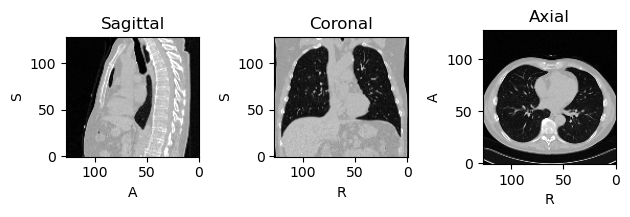

In [3]:
query_image.plot(indices=(64, 64, 64))
query_image = query_image.numpy()

In [4]:
inference.display.render(query_image)

interactive(children=(Dropdown(description='plane', options=('Axial', 'Coronal', 'Sagittal'), value='Axial'), …

In [5]:
inference.display.render_highlighted_chunk(query_image, loc=(4, 4, 4))

interactive(children=(Dropdown(description='plane', options=('Axial', 'Coronal', 'Sagittal'), value='Axial'), …

In [6]:
inference.display.render_highlighted_chunk(query_image, loc=(1, 2, 4))

interactive(children=(Dropdown(description='plane', options=('Axial', 'Coronal', 'Sagittal'), value='Axial'), …

In [7]:
adapter = InferenceAdapter.from_pl_checkpoint("r3d_18_moco_v119", 70)
adapter.load_index()

Index loaded, 23391 series found.


In [8]:
x, y, z = 8, 4, 4
inference.display.render_highlighted_chunk(query_image, loc=(x, y, z))
emb = adapter.query_embedding(query_image, loc=(x, y, z))

interactive(children=(Dropdown(description='plane', options=('Axial', 'Coronal', 'Sagittal'), value='Axial'), …

In [9]:
results = adapter.query_index(emb, loc=(x, y, z))

In [10]:
top1 = results[0]
inference.display.render_highlighted_chunk(
    data.reader.env_reader.read_series(top1.series_id)[0].numpy(),
    loc=(top1.x, top1.y, top1.z)
)

interactive(children=(Dropdown(description='plane', options=('Axial', 'Coronal', 'Sagittal'), value='Axial'), …

In [11]:
top2 = results[1]
inference.display.render_highlighted_chunk(
    data.reader.env_reader.read_series(top2.series_id)[0].numpy(),
    loc=(top2.x, top2.y, top2.z)
)

interactive(children=(Dropdown(description='plane', options=('Axial', 'Coronal', 'Sagittal'), value='Axial'), …